<a href="https://colab.research.google.com/github/cchio74/forgemaster/blob/master/Lab12_BJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import tensorflow as tf
import numpy as np

In [82]:
x_data=np.array([1,2,3,4,5,6,7,8,9,10],np.float32).reshape(5,2)
y_data=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],np.float32).reshape(5,3)

In [83]:
input_dim=x_data.shape[1]
units=y_data.shape[1]

In [84]:
x_data

array([[ 1.,  2.],
       [ 3.,  4.],
       [ 5.,  6.],
       [ 7.,  8.],
       [ 9., 10.]], dtype=float32)

# Linear regression

In [85]:
learning_rate=1e-2

In [86]:
w_init=tf.random_normal_initializer()
b_init=tf.zeros_initializer()

In [87]:
b_init((2,1))

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.],
       [0.]], dtype=float32)>

In [88]:
w=tf.Variable(w_init(shape=(input_dim,units)),dtype='float32')

In [89]:
b=tf.Variable(b_init(shape=(1,units)),dtype='float32')

In [90]:
for i in range(100):
  # loss
  with tf.GradientTape() as tape:
    hypothesis=tf.matmul(x_data,w)+b
    loss=tf.reduce_mean(tf.square(hypothesis-y_data))

  # gradient
  w_grad,b_grad=tape.gradient(loss,[w,b])

  # updata
  w.assign_sub(learning_rate*w_grad)
  b.assign_sub(learning_rate*b_grad)

  # display
  if i % 10==0:
    print('iteration {} loss {}'.format(i,loss))

iteration 0 loss 84.67301940917969
iteration 10 loss 0.16630321741104126
iteration 20 loss 0.1595485955476761
iteration 30 loss 0.15310396254062653
iteration 40 loss 0.14691971242427826
iteration 50 loss 0.1409851461648941
iteration 60 loss 0.13529030978679657
iteration 70 loss 0.1298256367444992
iteration 80 loss 0.12458157539367676
iteration 90 loss 0.11954937875270844


In [7]:
w.numpy()

array([0.9492163], dtype=float32)

In [91]:
b.numpy()

array([[-0.07835428,  0.05755375,  0.19101875]], dtype=float32)

In [92]:
w

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[0.7211087 , 0.6804876 , 0.7460692 ],
       [0.61723465, 0.7687391 , 0.8286704 ]], dtype=float32)>

In [93]:
tf.matmul(x_data,w)+b

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[ 1.8772237,  2.2755196,  2.5944288],
       [ 4.5539103,  5.1739726,  5.7439075],
       [ 7.230597 ,  8.072426 ,  8.893387 ],
       [ 9.907284 , 10.97088  , 12.042867 ],
       [12.583971 , 13.869332 , 15.192346 ]], dtype=float32)>

In [94]:
y_data

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.],
       [10., 11., 12.],
       [13., 14., 15.]], dtype=float32)

# subclassing

In [ ]:
tf.keras.layers.Layer().add_weight()

In [95]:
# model
class Model(tf.keras.layers.Layer):
  def __init__(self,input_dim,units):
    super(Model,self).__init__()

    self.w=self.add_weight(shape=(input_dim,units),initializer='random_normal')
    self.b=self.add_weight(shape=(units,),initializer='zeros')

  def call(self,inputs):
    return tf.matmul(inputs,self.w)+self.b

In [96]:
# loss
loss=tf.keras.losses.MeanSquaredError()

In [99]:
# gradient
def grad(model,inputs,targets):
  with tf.GradientTape() as tape:
    loss_value=loss(targets,model(inputs))
  return tape.gradient(loss_value,[model.w, model.b])

In [100]:
# define
model=Model(input_dim,units)
optimizer=tf.keras.optimizers.SGD(learning_rate)

In [108]:
# learning
for i in range(100):
  # gradient
  grads=grad(model,x_data,y_data)

  # updata
  optimizer.apply_gradients(zip(grads,[model.w,model.b]))

  # display

if 1%10==0:
  print('{}{}'.format(i.loss(y_data,model(x_data))))

In [107]:
model.w.numpy()

array([[0.75288457, 0.711722  , 0.7082232 ],
       [0.61093956, 0.74886596, 0.85174114]], dtype=float32)

In [106]:
model.b.numpy()

array([-0.23581052,  0.00441398,  0.2628999 ], dtype=float32)

In [105]:
model(x_data)

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[ 1.7389531,  2.2138681,  2.6746054],
       [ 4.4666014,  5.135044 ,  5.794534 ],
       [ 7.19425  ,  8.056219 ,  8.914464 ],
       [ 9.921899 , 10.977396 , 12.034392 ],
       [12.649547 , 13.898571 , 15.154321 ]], dtype=float32)>

In [104]:
y_data

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.],
       [10., 11., 12.],
       [13., 14., 15.]], dtype=float32)

# Sequential model

In [115]:
# model
model=tf.keras.Sequential()
model.add(tf.keras.Input(shape=(input_dim,)))
model.add(tf.keras.layers.Dense(units,kernel_initializer='random_normal'))

In [116]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 3)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


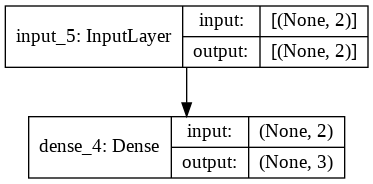

In [117]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [119]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate),loss=tf.keras.losses.MeanSquaredError())

In [120]:
# learning
model.fit(x_data,y_data,epochs=100,verbose=0)

In [121]:
model.evaluate(x_data,y_data,verbose=1)

1/1 [==============================] - 0s 66ms/step - loss: 0.1101


0.11011496931314468

In [122]:
model.get_weights()

[array([[0.7270833 , 0.7128424 , 0.69903684],
        [0.6115938 , 0.74088365, 0.8699093 ]], dtype=float32),
 array([-0.0748582 ,  0.05649408,  0.18701142], dtype=float32)]

In [123]:
y_data

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.],
       [10., 11., 12.],
       [13., 14., 15.]], dtype=float32)

In [124]:
model.predict(x_data)

array([[ 1.8754127,  2.2511036,  2.625867 ],
       [ 4.5527673,  5.158556 ,  5.763759 ],
       [ 7.230121 ,  8.066008 ,  8.901651 ],
       [ 9.907475 , 10.973459 , 12.039544 ],
       [12.584828 , 13.880912 , 15.177436 ]], dtype=float32)